In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
from torchvision import transforms, utils, models
from torch.utils.data import Dataset, DataLoader

In [4]:
from synthetic_utils import *

In [5]:
from trainer import *
from networks import *
from losses import *

In [6]:
if torch.cuda.is_available():
    device="cuda"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    device="cpu"
    torch.set_default_tensor_type('torch.FloatTensor')
print(device)

cuda


In [7]:
DATA_PATH = 'generated_data.pkl'
TRAIN_PATH = 'gen_train.pkl'
VAL_PATH = 'gen_val.pkl'
TEST_PATH = 'gen_test.pkl'

In [8]:
with open(TRAIN_PATH, 'rb') as f:
    imgs_train, shapes_train, colors_train = pickle.load(f)

In [9]:
with open(VAL_PATH, 'rb') as f:
    imgs_val, shapes_val, colors_val = pickle.load(f)

In [10]:
with open(TEST_PATH, 'rb') as f:
    imgs_test, shapes_test, colors_test = pickle.load(f)

In [11]:
imgs_train.shape, imgs_val.shape, imgs_test.shape, shapes_train.shape, shapes_val.shape, shapes_test.shape, colors_train.shape, colors_val.shape, colors_test.shape

((40000, 96, 96, 3),
 (5000, 96, 96, 3),
 (5000, 96, 96, 3),
 (40000, 1),
 (5000, 1),
 (5000, 1),
 (40000, 1),
 (5000, 1),
 (5000, 1))

In [12]:
imgs_train = imgs_train[:5000]
colors_train = colors_train[:5000]
shapes_train = shapes_train[:5000]

imgs_val = imgs_val[:500]
colors_val = colors_val[:500]
shapes_val = shapes_val[:500]

In [13]:
shapes_train = shapes_train.squeeze()
shapes_val = shapes_val.squeeze()
shapes_test = shapes_test.squeeze()
colors_train = colors_train.squeeze()
colors_val = colors_val.squeeze()
colors_test = colors_test.squeeze()

## Train only encoder first

In [14]:
encoder = LeNet()
classifier = ClassNet()

In [15]:
criterion = nn.BCELoss()
opt_cls = optim.Adam(classifier.parameters(), lr=0.001, betas=(0.9, 0.999))
opt_enc = optim.Adam(encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [16]:
num_epochs = 100
train_losses = []
train_accs = []
val_losses = []
val_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        train_loss, train_acc = train_encoder_classifier_epoch(encoder,
                                classifier, imgs_train, shapes_train, opt_enc,
                                opt_cls, criterion, device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(encoder, classifier,
                                imgs_val, shapes_val, criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.026 (0.026)	Loss 0.6912 (0.6912)	Accuracy 0.5625 (0.5625)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [30/78]	Time 0.016 (0.017)	Loss 0.6945 (0.6950)	Accuracy 0.4531 (0.4970)
Batch: [60/78]	Time 0.016 (0.017)	Loss 0.6936 (0.6945)	Accuracy 0.4844 (0.4977)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.6927 (0.6927)	Accuracy 0.5000 (0.5000)
Avg validation loss: 0.6922997817993164 	 Accuracy: 0.51
--------------------
Epoch 0/100	Time 1.339 sec (1.339 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.006 (0.006)	Loss 0.6908 (0.6908)	Accuracy 0.5625 (0.5625)
Batch: [30/78]	Time 0.016 (0.015)	Loss 0.2347 (0.5926)	Accuracy 0.9062 (0.7167)
Batch: [60/78]	Time 0.016 (0.016)	Loss 0.0924 (0.4149)	Accuracy 0.9844 (0.8099)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.0423 (0.0423)	Accuracy 1.0000 (1.0000)
Avg validation loss: 0.046797607198357585 	 Accuracy: 0.994
--------------------
Epoch 1/100	Time 1.298 sec (1.318 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.0540 (0.0540)	Accuracy 1.0000 (1.0000)
Batch: [30/78]	Time 0.017 (0.015)	Loss 0.0819 (0.1857)	Accuracy 0.9688 (0.9516)
Batch: [60/78]	Time 0.016 (0.016)	Loss 0.0094 (0.1079)	Accuracy 1.0000 (0.9741)
----------
Test: [0/7]	Time 0.004 (0.004)

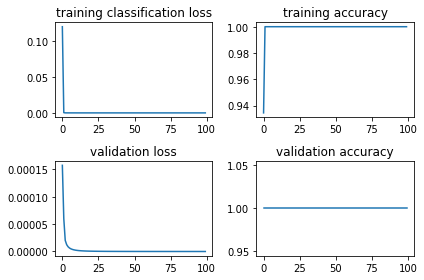

In [30]:
plt.subplot(221)
plt.title('training classification loss')
plt.plot(train_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(train_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(val_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(val_accs)
plt.tight_layout()

## Train only adversary

In [18]:
adv_encoder = LeNet()
adversary = ClassNet()

In [19]:
adv_criterion = nn.BCELoss()
opt_adv = optim.Adam(adversary.parameters(), lr=0.001, betas=(0.9, 0.999))
opt_adv_enc = optim.Adam(adv_encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [20]:
num_epochs = 100
train_losses = []
train_accs = []
val_losses = []
val_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        train_loss, train_acc = train_encoder_classifier_epoch(adv_encoder,
                                adversary, imgs_train, colors_train, opt_adv_enc,
                                opt_adv, adv_criterion, device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(adv_encoder, adversary,
                                imgs_val, colors_val, adv_criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.013 (0.013)	Loss 0.6941 (0.6941)	Accuracy 0.4844 (0.4844)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [30/78]	Time 0.033 (0.031)	Loss 0.0085 (0.2979)	Accuracy 1.0000 (0.8347)
Batch: [60/78]	Time 0.032 (0.031)	Loss 0.0030 (0.1532)	Accuracy 1.0000 (0.9160)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.015 (0.015)	Loss 0.0001 (0.0001)	Accuracy 1.0000 (1.0000)
Avg validation loss: 0.00015755741161410696 	 Accuracy: 1.0
--------------------
Epoch 0/100	Time 2.598 sec (2.598 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.011 (0.011)	Loss 0.0002 (0.0002)	Accuracy 1.0000 (1.0000)
Batch: [30/78]	Time 0.033 (0.031)	Loss 0.0003 (0.0005)	Accuracy 1.0000 (1.0000)
Batch: [60/78]	Time 0.030 (0.032)	Loss 0.0017 (0.0004)	Accuracy 1.0000 (1.0000)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.0000 (0.0000)	Accuracy 1.0000 (1.0000)
Avg validation loss: 6.0037322829884944e-05 	 Accuracy: 1.0
--------------------
Epoch 1/100	Time 2.667 sec (2.632 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.0001 (0.0001)	Accuracy 1.0000 (1.0000)
Batch: [30/78]	Time 0.033 (0.033)	Loss 0.0000 (0.0000)	Accuracy 1.0000 (1.0000)
Batch: [60/78]	Time 0.032 (0.031)	Loss 0.0001 (0.0000)	Accuracy 1.0000 (1.0000)
----------
Test: [0/7]	Time 0.005 (0.0

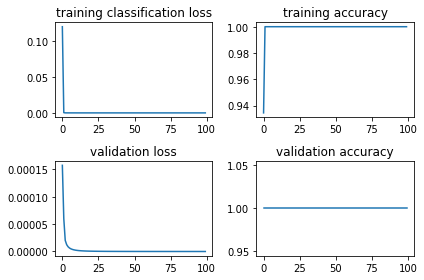

In [31]:
plt.subplot(221)
plt.title('training classification loss')
plt.plot(train_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(train_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(val_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(val_accs)
plt.tight_layout()

## Train adversary on original encoder

## LAFTR Training

In [22]:
laftr_encoder = LeNet()
laftr_adversary = ClassNet()
laftr_classifier = ClassNet()

In [23]:
laftr_adv_criterion = AdvEqOddsLoss()
laftr_cls_criterion = nn.BCELoss()

In [24]:
laftr_opt_adv = optim.Adam(laftr_adversary.parameters(), lr=0.001, betas=(0.9, 0.999))
laftr_opt_cls = optim.Adam(laftr_classifier.parameters(), lr=0.001, betas=(0.9, 0.999))
laftr_opt_enc = optim.Adam(laftr_encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [25]:
num_epochs = 100

clsTrain_losses = []
clsTrain_accs = []
clsTrainCombined_losses = []
advTrain_losses = []
advTrain_accs = []
advTrainCombined_losses = []

combinedVal_losses = []
clsVal_losses = []
clsVal_accs = []
advVal_losses = []
advVal_accs = []

epoch_time = AverageMeter()

In [26]:
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
        
        cls_loss, cls_en_combinedLoss, cls_en_acc, adv_loss, adv_combinedLoss, adv_acc = laftr_epoch(
                                                        laftr_encoder, laftr_classifier, laftr_adversary, imgs_train,
                                                        shapes_train, colors_train, laftr_opt_enc, laftr_opt_cls, laftr_opt_adv, 
                                                        laftr_cls_criterion, laftr_adv_criterion, device)
        
        clsTrain_losses.append(cls_loss)
        clsTrain_accs.append(cls_en_acc)
        clsTrainCombined_losses.append(cls_en_combinedLoss)
        advTrain_losses.append(adv_loss)
        advTrain_accs.append(adv_acc)
        advTrainCombined_losses.append(adv_combinedLoss)
        
        print('Classifier accuracy: {}\t Adversary Accuracy: {}'.format(cls_en_acc, adv_acc))
        # validate
        print('-'*10)
        
        combinedVal_loss, clsVal_loss, clsVal_acc, advVal_loss, advVal_acc = laftr_validate(
                                                        laftr_encoder, laftr_classifier, laftr_adversary, imgs_val,
                                                        shapes_val, colors_val,laftr_cls_criterion, laftr_adv_criterion, device)
        
        combinedVal_losses.append(combinedVal_loss)
        clsVal_losses.append(clsVal_loss)
        clsVal_accs.append(clsVal_acc)
        advVal_losses.append(advVal_loss)
        advVal_accs.append(advVal_acc)
        
        print('Classifier validation acc: {:.4f} \t Adv validation acc: {:.4f}'.format(clsVal_acc, advVal_acc))
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.095 (0.095)
Classifier loss 0.6903 (0.6903)	Adversary loss -0.0006 (-0.0006)
Combined Loss during classifier step 0.6901 (0.6901)	Combined Loss during adversary step -0.6790 (-0.6790)
Classifier Accuracy 0.5625 (0.5625)	Adversary Accuracy 0.5156 (0.5156)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [30/78]	Time 0.069 (0.062)
Classifier loss 0.6941 (0.6965)	Adversary loss 0.0193 (0.0184)
Combined Loss during classifier step 0.7168 (0.7164)	Combined Loss during adversary step -0.7131 (-0.7110)
Classifier Accuracy 0.4688 (0.5071)	Adversary Accuracy 0.5938 (0.5519)
Batch: [60/78]	Time 0.059 (0.060)
Classifier loss 0.6908 (0.6950)	Adversary loss 0.0155 (0.0184)
Combined Loss during classifier step 0.7058 (0.7147)	Combined Loss during adversary step -0.7059 (-0.7112)
Classifier Accuracy 0.6562 (0.5105)	Adversary Accuracy 0.5469 (0.5446)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Classifier accuracy: 0.524	 Adversary Accuracy: 0.5318
----------
Test batch: [0/7]	Time 0.008 (0.008)
Classifier loss 0.6786 (0.6786)	Adversary loss -0.0404 (-0.0404)
Combined Loss 0.6381 (0.6381)	Classifier Accuracy 0.5938 (0.5938)	Adversary Accuracy 0.5312 (0.5312)
Classifier validation acc: 0.5560 	 Adv validation acc: 0.5000
--------------------
Epoch 0/100	Time 4.804 sec (4.804 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.078 (0.078)
Classifier loss 0.6865 (0.6865)	Adversary loss -0.0230 (-0.0230)
Combined Loss during classifier step 0.6442 (0.6442)	Combined Loss during adversary step -0.6530 (-0.6530)
Classifier Accuracy 0.5156 (0.5156)	Adversary Accuracy 0.4062 (0.4062)
Batch: [30/78]	Time 0.058 (0.059)
Classifier loss 0.0870 (0.4779)	Adversary loss 0.2486 (0.0527)
Combined Loss during classifier step 0.3337 (0.5287)	Combined Loss during adversary step -0.3186 (-0.4953)
Classifier Accuracy 0.9688 (0.7676)	Adversary Accuracy 0.5625 (0.4904)
Batch: [60/78]	Time 0.0

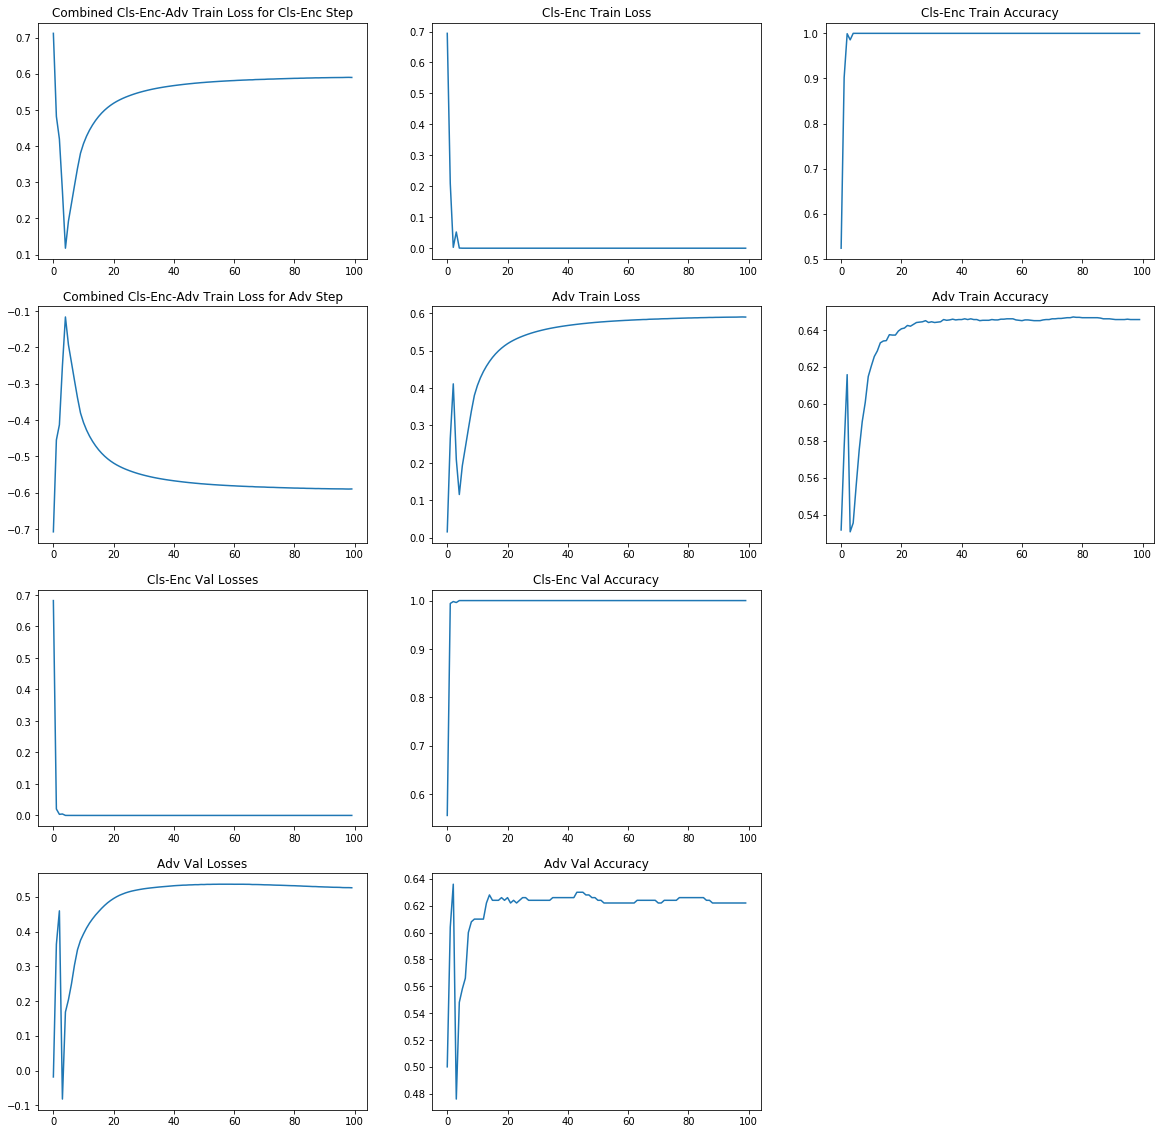

In [27]:
plt.figure(figsize=(20,20))
plt.subplot(431)
plt.title('Combined Cls-Enc-Adv Train Loss for Cls-Enc Step')
plt.plot(clsTrainCombined_losses)
plt.subplot(432)
plt.title('Cls-Enc Train Loss')
plt.plot(clsTrain_losses)
plt.subplot(433)
plt.title('Cls-Enc Train Accuracy')
plt.plot(clsTrain_accs)
plt.subplot(434)
plt.title('Combined Cls-Enc-Adv Train Loss for Adv Step')
plt.plot(advTrainCombined_losses)
plt.subplot(435)
plt.title('Adv Train Loss')
plt.plot(advTrain_losses)
plt.subplot(436)
plt.title('Adv Train Accuracy')
plt.plot(advTrain_accs)

plt.subplot(437)
plt.title('Cls-Enc Val Losses')
plt.plot(clsVal_losses)
plt.subplot(438)
plt.title('Cls-Enc Val Accuracy')
plt.plot(clsVal_accs)
plt.subplot(4,3,10)
plt.title('Adv Val Losses')
plt.plot(advVal_losses)
plt.subplot(4,3,11)
plt.title('Adv Val Accuracy')
plt.plot(advVal_accs)

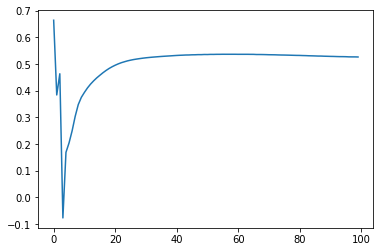

In [28]:
plt.plot(combinedVal_losses)